In [126]:
import numpy as np
import matplotlib.pyplot as plt
from fastespy.functions import tesresponse, calc_xi, expflare
import copy

In [2]:
%matplotlib inline

In [113]:
t = np.linspace(0.,30.,10000)

In [114]:
def pre_factor(td, tr, ti):
    result = 1. / tr - 1. / ti
    result *= 1. / td - 1. / ti
    result /= (1. / tr - 1 / td)
    return result

def I_tes(t, apply_t0_cut= True, **kwargs):
    if np.isscalar(t):
        t = np.array([t])
    elif type(t) == list:
        t = np.array(t)

    xi = pre_factor(kwargs['td'], kwargs['tr'], kwargs['ti'])

    if apply_t0_cut:
        m = t > kwargs['t0']
    else:
        m = np.ones(t.size, dtype=np.bool)
    rise_exp = -(t - kwargs['t0']) / kwargs['tr']
    decay_exp = -(t - kwargs['t0']) / kwargs['td']

    exp_rise = np.exp(rise_exp)
    exp_decay = np.exp(decay_exp)
    
    result = np.zeros_like(t)
    result[m] = kwargs['c'] - (exp_rise - exp_decay)[m] * kwargs['A'] * xi
    result[~m] = np.full((~m).sum(), kwargs['c'])

    return result

In [115]:
def I_tes_simple(t, tol=1e-6, **kwargs):
    if np.isscalar(t):
        t = np.array([t])
    elif type(t) == list:
        t = np.array(t)

    m = t > kwargs['t0']

    rise_exp = -(t - kwargs['t0']) / kwargs['tr']
    decay_exp = -(t - kwargs['t0']) / kwargs['td']

    exp_rise = np.exp(rise_exp)
    exp_decay = np.exp(decay_exp)
    
    result = np.zeros_like(t)
    
    result = np.full(t.size, kwargs['c']).astype(np.float64)
    if np.abs(kwargs['tr'] - kwargs['td']) < tol:
        result[m] -= np.abs(kwargs['A'] * ((t - kwargs['t0']) * exp_rise)[m])
    else:
        result[m] -= np.abs((exp_rise - exp_decay)[m] * kwargs['A'])
    
    return result

In [124]:
pars = dict(c=0, A=1, tr=0.5, td=1., t0=5.)
pars2 = copy.deepcopy(pars)
pars2['ti'] = 1.
pars2['A'] = 4.29
pars3 = copy.deepcopy(pars)
pars3['A'] = 4.

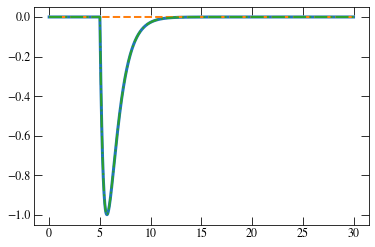

In [125]:
try:    
    plt.plot(t, tesresponse(t, **pars), lw = 3)
    plt.plot(t, I_tes(t, apply_t0_cut=True, **pars2), ls = '--', lw = 2)
except ZeroDivisionError:
    pass
plt.plot(t, I_tes_simple(t, **pars3), ls = '-.', lw = 2)
#plt.plot(t, I_tes(t, apply_t0_cut=False, **pars2), ls = '-.', lw = 2)
#plt.gca().set_ylim(-1, 1)

In [123]:
print (tesresponse(t, **pars) / I_tes_simple(t, **pars3))

[        nan         nan         nan ... 13.33333333 13.33333333
 13.33333333]


/Users/manuelmeyer/anaconda3/envs/gammapy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [91]:
pre_factor(pars2['td'], pars2['tr'], pars2['ti']) * pars2['A'] / (pars['A'] / calc_xi(pars['td'], pars['tr']))

-1.2611303154159255

(-10, 10)

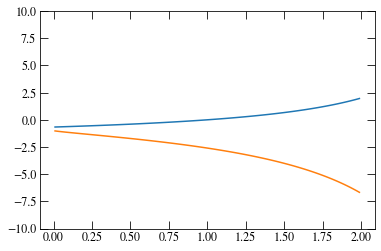

In [92]:
ti = 1
td = 3.
tr = np.linspace(0.01,1.99, 100)

plt.plot(tr, pre_factor(td, tr, ti))
plt.plot(tr, 1. / calc_xi(td, tr))

plt.gca().set_ylim(-10,10)

In [66]:
pre_factor(td, tr, ti)

array([-4.97487437e-01, -4.92385787e-01, -4.87179487e-01, -4.81865285e-01,
       -4.76439791e-01, -4.70899471e-01, -4.65240642e-01, -4.59459459e-01,
       -4.53551913e-01, -4.47513812e-01, -4.41340782e-01, -4.35028249e-01,
       -4.28571429e-01, -4.21965318e-01, -4.15204678e-01, -4.08284024e-01,
       -4.01197605e-01, -3.93939394e-01, -3.86503067e-01, -3.78881988e-01,
       -3.71069182e-01, -3.63057325e-01, -3.54838710e-01, -3.46405229e-01,
       -3.37748344e-01, -3.28859060e-01, -3.19727891e-01, -3.10344828e-01,
       -3.00699301e-01, -2.90780142e-01, -2.80575540e-01, -2.70072993e-01,
       -2.59259259e-01, -2.48120301e-01, -2.36641221e-01, -2.24806202e-01,
       -2.12598425e-01, -2.00000000e-01, -1.86991870e-01, -1.73553719e-01,
       -1.59663866e-01, -1.45299145e-01, -1.30434783e-01, -1.15044248e-01,
       -9.90990991e-02, -8.25688073e-02, -6.54205607e-02, -4.76190476e-02,
       -2.91262136e-02, -9.90099010e-03,  1.01010101e-02,  3.09278351e-02,
        5.26315789e-02,  

In [131]:
def max_expflare(**pars):
    sum_t = pars['td'] + pars['tr']
    result = 2. * pars['A']
    result /= sum_t
    result *= np.power(pars['td'], pars['td'] / sum_t) 
    result *= np.power(pars['tr'], pars['tr'] / sum_t)
    return pars['c'] - result

def max_expflare2(**pars):
    sum_t = pars['td'] + pars['tr']
    result = 2. * pars['A']
    result /= sum_t
    result *= np.power(pars['td'] / pars['tr'], pars['td'] / sum_t) 
    result *= pars['tr']
    return pars['c'] - result

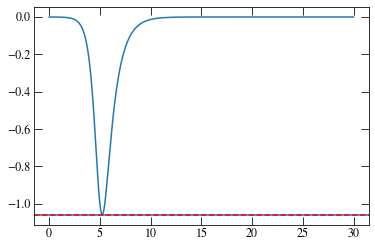

In [132]:
plt.plot(t, expflare(t, **pars))
plt.axhline(max_expflare(**pars))

plt.axhline(max_expflare2(**pars), ls='--', color='r')